First Project: Heart Disease Prediction with Machine Learning

Heart disease continues to be one of the leading causes of death for Americans each year despite of race and gender. According to the Center of Disease Control and Prevention, forty percent of premature deaths related to heart disease can be prevented by modifying different risk factors such as smoking, physical inactivity, unhealthy diets, and stress levels.  Unfortunately, medical errors and undesirable results are the reason for the need for computer-based diagnosis to achieve high quality medical procedure results. Machine learning in Medical health care is an emerging field of extreme importance that may provide diagnosis and prognosis. The main goal regarding the use of machine learning in the medical field, specifically in cardiovascular disease is to assess and summarize the overall performance in prediction ability of different algorithms.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#random forest 
from sklearn.ensemble import RandomForestClassifier
#decision tree 
from sklearn.tree import DecisionTreeClassifier
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load Dataframe and print first 5 rows using head()

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1


In [6]:
#shape 
df.shape

(303, 14)

In [7]:
# description 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#checking for null values! 

df.isnull().sum()
# no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# information to understand regarding my variables

In [11]:
df.sex.unique()


array([1, 0], dtype=int64)

In [12]:
df.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [13]:
df.trestbps.unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [14]:
df.fbs.unique()

array([1, 0], dtype=int64)

In [15]:
df.restecg.unique()

array([0, 1, 2], dtype=int64)

In [16]:
df.exang.unique()

array([0, 1], dtype=int64)

In [17]:
df.ca.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [18]:
df.thal.unique()

array([1, 2, 3, 0], dtype=int64)

'''
Age
Sex – Value 1: Male
      Value 0 : Female
CP – Chest pain
	Value1: Typical Chest Pain
	Value 2: Atypical Chest Pain
	Value 3: Non- Chest Pain 
	Value 4: Asymptomatic 
TRESTBPS – Resting Blood pressure
Chol – cholesterol levels in mg/dl 
FBS- Fasting Blood Sugar 
	Value 1 = > 120 mg/dl = TRUE
	Value 0 = FALSE
RESTECG – resting electrocardiographic results
	Value 0: Showing Probable or hypertrophy 
	Value 1: normal 
	Value 2: ST-T wave abnormality 
THALACH – max heart rate achieved
EXANG- exercise induced angina/chest pain 
	Value 1  = Yes
	Value 0 = No 
OldPeak – ST depression induced by exercise relative to rest

Slope – slope of the peak exercise ST segment
	Value 1: Upsloping
	Value 2: Flat
	Value 3: Downsloping 
CA – Number of major Vessels (0-3)
THAL – A blood disorder called thalassemia 
	Value 3 = Normal 
	Value 6 = Fixed Defect 
	Value 7 = Reversable Defect
Target – Hear Disease
	Value 0 = No 
	Value 1 = Yes 
'''

In [20]:
# i want to focus on my targer variable for now 
df["target"].describe()


count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [21]:
df.target.unique()

array([1, 0], dtype=int64)

In [22]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


<AxesSubplot:>

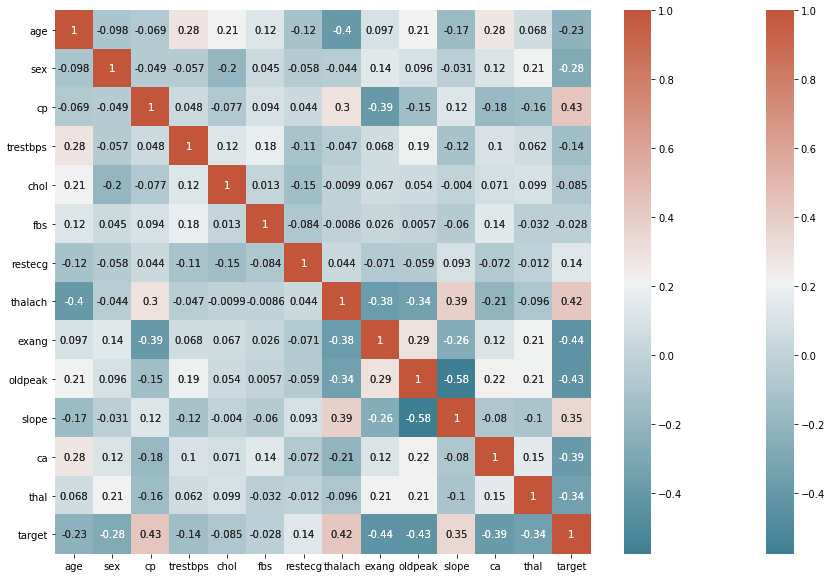

In [23]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [24]:
#I see moderate correlation with target but it gets VERY weak with FBS/fasting Blood Sugar

In [25]:
#counts of people with/without Heart Disease 
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

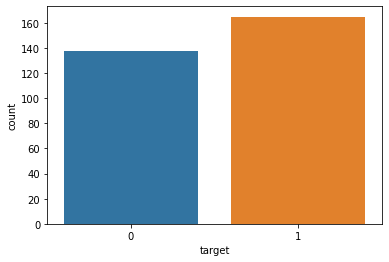

In [26]:
HD = df['target']
sns.countplot(HD)

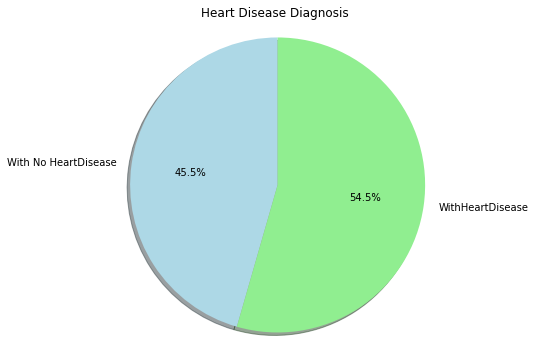

In [27]:
HRnegative =len(df[df['target'] == 0])
HRpositive = len(df[df['target']== 1])

plt.figure(figsize=(8,6))

# Plot 
labels = 'With No HeartDisease','WithHeartDisease'
sizes = [HRnegative,HRpositive]
colors = colors = ['lightblue', 'lightgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Heart Disease Diagnosis ")
plt.axis('equal')
plt.show()

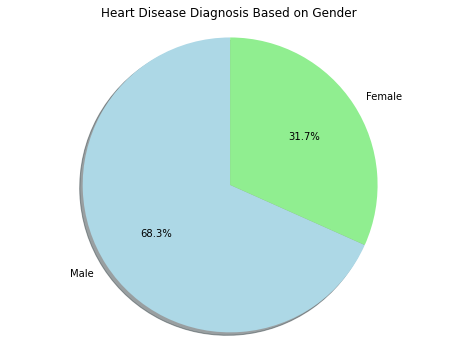

In [28]:
# now ill move on to my next features: 


# Gender 
male =len(df[df['sex'] == 1])
female = len(df[df['sex']== 0])

plt.figure(figsize=(8,6))

# plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['lightblue', 'lightgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Heart Disease Diagnosis Based on Gender ")
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='cp', ylabel='target'>

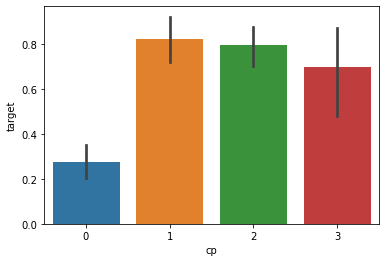

In [29]:
# Chest Pains 
sns.barplot(df["cp"],HD)


In [30]:
# okay so here, chest pain of '0' are much less likely to have heart problems! typical angina

<AxesSubplot:xlabel='fbs', ylabel='target'>

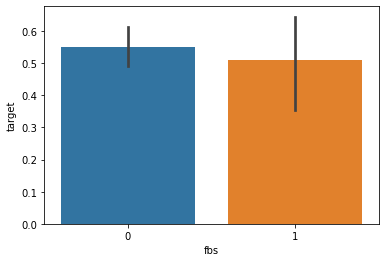

In [31]:
#FBS column
sns.barplot(df["fbs"],HD)

In [32]:
#restecg feature

<AxesSubplot:xlabel='restecg', ylabel='target'>

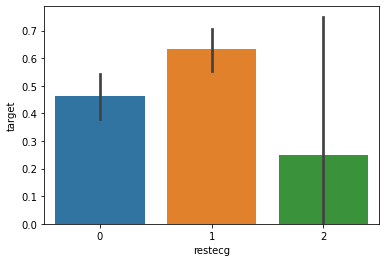

In [33]:
#plot
sns.barplot(df["restecg"],HD)

In [34]:
# people with resting electrocardiographic 1 and 0 are more likely to have heart disease compared
#to someone with RESTECG of 2 

<AxesSubplot:xlabel='exang', ylabel='target'>

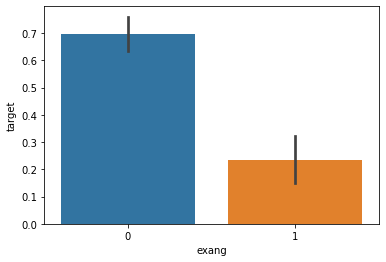

In [35]:
# exang = Exercise induced angina 

sns.barplot(df["exang"],HD)

In [36]:
# okay, people with exang of 1 are less likely to have heart disease problems 

In [37]:
# slope feature 

<AxesSubplot:xlabel='slope', ylabel='target'>

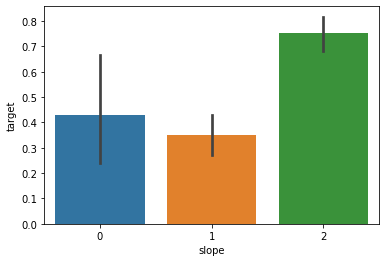

In [38]:
sns.barplot(df["slope"],HD)

In [39]:
# slope 2 causes heart pain compared to slope 0 and 1 

<AxesSubplot:xlabel='ca', ylabel='target'>

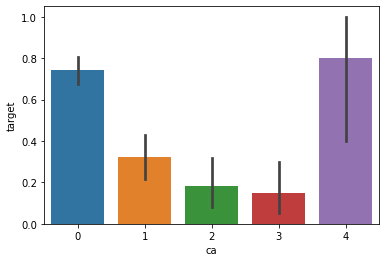

In [40]:
#ca feature 
sns.barplot(df["ca"],HD)

In [41]:
#Hmmm, here i see that CA of 4 has a very LARGE number of heart patients 

In [42]:
# I want to use Pandas Profiling here for the first time ever! 
from pandas_profiling import ProfileReport
df.profile_report()

In [43]:
# ready to train/test split 

In [44]:
#import sklearn lib
from sklearn.model_selection import train_test_split
# setting up my x an y 
predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
#size of my x train set 
X_train.shape

(242, 13)

In [47]:
# size of my x test set 
X_test.shape

(61, 13)

In [48]:
#size of my y train 
Y_train.shape

(242,)

In [49]:
# size of my y test
Y_test.shape

(61,)

In [50]:
# model fitting 
from sklearn.metrics import accuracy_score

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [52]:
#shape of my y pred
Y_pred_lr.shape

(61,)

In [53]:
from sklearn.metrics import classification_report 
print(classification_report(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [54]:
#score of my LR
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print('Accuracy Score Using Logistic Regression:' +str(score_lr)+" %")

Accuracy Score Using Logistic Regression:85.25 %


In [55]:
#decision tree 
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [56]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("Accuracy Score Using Decision Tree: "+str(score_dt)+" %")

Accuracy Score Using Decision Tree: 80.33 %


In [57]:
print(classification_report(Y_test, Y_pred_dt)) # output accuracy

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [58]:
#random forest 
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [59]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("Accuracy Score Using Random Forest Tree: "+str(score_rf)+" %")

Accuracy Score Using Random Forest Tree: 91.8 %


In [60]:
print(classification_report(Y_test, Y_pred_rf)) # output accuracy

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



<AxesSubplot:title={'center':'Final Scores of Models'}, xlabel='Algorithms', ylabel='Accuracy score'>

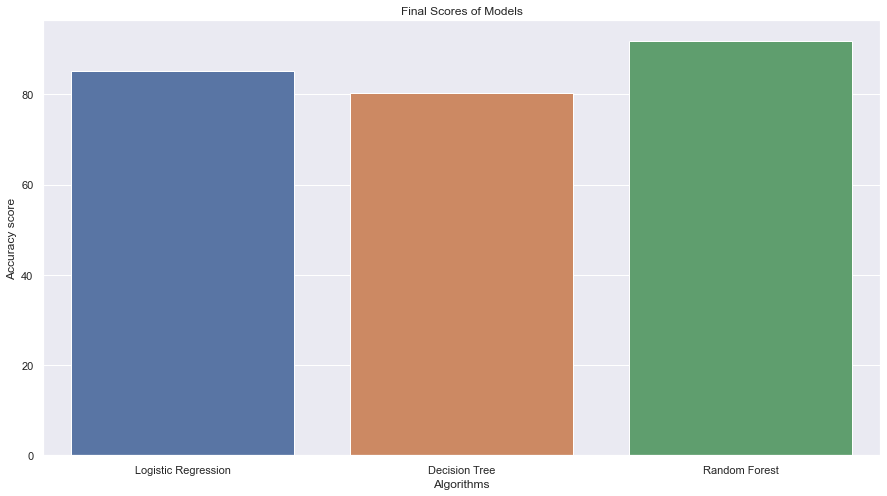

In [61]:
#visualization of final scores 
scores = [score_lr,score_dt,score_rf]
algorithms = ["Logistic Regression","Decision Tree","Random Forest"]    

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title('Final Scores of Models')
sns.barplot(algorithms,scores)

In [62]:
# Random Forest has the highest performance in accuracy compared to Logistic Regression and Decision Trees. 